# 3.2发送基本请求

## 3.2.1 发送get请求

### 1、不携带url参数的get请求

In [ ]:
import requests
re=requests.get("http://www.baidu.com")
print(re.status_code)  #查看响应状态码

: 

In [ ]:
re=requests.get("https://ssr1.scrape.center")
print(re.text)           #查看响应文本

: 

### 2、携带url参数的get请求
#### （1）直接拼接网址（手动构建url）

In [ ]:
base_url="http://www.baidu.com/s"            #基本网址
param="wd=python"                            #参数
full_url=base_url+"?"+param                  #手动构造url
re=requests.get(full_url)                    #发送请求
print(re.status_code)                        #查看响应状态码

: 

#### （2）将url参数转换为字典，将该字典传入params参数。

In [ ]:
base_url="http://www.baidu.com/s"            #基本网址
wd_params={"wd":"python"}                    #参数
re=requests.get(base_url,params=wd_params)   #发送请求
print(re.status_code)                        #查看响应状态码

: 

In [ ]:
base_url="http://www.baidu.com/s"            #基本网址
wd_params={"wd":"西安明德理工学院"}          #换了一个参数
re=requests.get(base_url,params=wd_params)   #发送请求
print(re.status_code)                        #查看响应状态码
re.encoding="utf-8"                          #text为乱码时，先将字符编码改为utf-8
print(re.text)

: 

In [ ]:
# 设置GET请求的参数（GET请求的参数放在url的后面，如果直接通过修改url的方式请求链接，看起来不够优雅。一般利用params参数传递这种信息，即以（数据字典）键值对形式传参）。
data={'ie':'utf-8','kw':'emo','fr':'search'}
re=requests.get('https://tieba.baidu.com/f',params=data)
print(re.status_code)
print(re.url)
print(re.text)

: 

## 3.2.2 发送post请求

In [ ]:
base_url = 'http://7229.easyju.cn/ajax/login.action?type=0'
form_data = {'userid':'zhong85608878','pwd': 'zhong85608878','code': '1576','pathname':''}
re = requests.post(base_url,data=form_data) # 根据URL构造请求，发送POST请求
print(re.status_code) # 查看响应信息的状态码

: 

## 3.2.3 处理响应

In [ ]:
print(re.text)   #获取字符串形式的响应内容
print(re.url)    #获取响应的最终网址

: 

In [ ]:
print(re.content)   #获取二进制形式的响应内容

: 

In [ ]:
print(re.request)   #获取请求方式
print(re.headers)   #获取响应头

: 

In [ ]:
print(re.encoding)    #获取响应内容的编码格式，与text属性搭配使用

: 

In [ ]:
re.encoding="utf-8"                          #将字符编码改为utf-8后，变成乱码
print(re.text)

: 

In [ ]:
print(re.cookies)    #获取服务器返回的cookie

: 

### 1、获取网页源代码

In [ ]:
re=requests.get("http://www.baidu.com")
print(re.text)  #查看百度的html代码

: 

In [ ]:
re.encoding="utf-8"       #调整字符编码
print(re.text)            #对比“检查”中的“元素”

: 

### 2、获取图片

#### 百度首页上除了文字信息以外，还包含一个百度Logo图片。若希望获取百度Logo的图片，我们需要：  
（1）先根据该图片对应的请求URL发送请求，  
（2）再使用content属性获取该图片对应的二进制数据，  
（3）并将数据写入到本地文件中。

In [ ]:
re = requests.get('https://www.baidu.com/img/PCtm_d9c8750bed0b3c7d089fa7d55720d6cf.png')
print(re.content)    # 获取百度Logo图片对应的二进制数据

: 

In [ ]:
with open('d:\\data\\baidu_logo.png','wb') as file:file.write(re.content)     # 将二进制数据写入d盘的data文件夹中

: 

#### open()函数：file=open(‘文件路径’,’模式’,编码方式)

#### windows编码方式是默认的。模式有很多种下面就是常见的：
 'r'： 以只读模式打开（缺省模式）（必须保证文件存在）  
 'w'：以只写模式打开。若文件存在，则会自动清空文件，然后重新创建；若文件不存在，则新建文件。使用这个模式必须要保证文件所在目录存在，文件可以不存在。  
 'a'：以追加模式打开。若文件存在，则会追加到文件的末尾；若文件不存在，则新建文件。

##### 下面四个模式要和上面的模式组合使用
 'b'：以二进制模式打开  
 't'： 以文本模式打开（缺省模式）  
 '+'：以读写模式打开  

##### 常见的mode组合示例：
 'r'或'rt'：默认模式，文本读模式  
 'w'或'wt'：以文本写模式打开（打开前文件会被清空）  
 'rb'：以二进制读模式打开  
 'wb'：以二进制写模式打开（打开前文件会被清空）

# 3.3 处理复杂请求

在互联网中，网页中的内容是千变万化的，如果只根据请求URL发送基本请求有可能无法获取网站的响应，此时需要根据网站接收请求的要求完善请求。例如，在访问登录后的页面时需要给请求头带上Cookies，在遇到403错误时需要给请求头添加User-Agent。

## 3.3.1 定制请求头

In [ ]:
re=requests.get("https://www.jianshu.com")
print(re.status_code)

: 

In [ ]:
base_url="https://www.jianshu.com"
h={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}
re=requests.get(url=base_url,headers=h)
print(re.status_code)

: 

## 3.3.2 验证cookie

当用户首次登录一个网站时，网站往往会要求用户输入用户名和密码，并且给出自动登录选项供用户勾选。  
用户如果勾选了自动登录选项，那么在下一次访问该网站时，不用输入用户名和密码便可以登录，这是因为第一次登录时服务器发送了包含登录凭证的Cookie到用户硬盘上，第二次登录时浏览器发送了Cookie，服务器验证Cookie后就识别了用户的身份，用户便无须输入用户名和密码。  
Cookie（有时也用其复数形式Cookies）是指某些网站为了辨别用户身份、进行会话跟踪，而暂时存储在客户端的一段文本数据（通常经过加密）。  
在Requests 库中，发送请求时可以通过两种方式携带 Cookie，一种方式是直接将包含Cookie 信息的请求头传入请求函数的headers参数；另一种方式是将Cookie信息传入请求函数的cookies参数。  
由于第一种方式较为简单，推荐。

In [ ]:
base_url='https://edu.tipdm.org/'   #泰迪云课堂首页
re = requests.post(base_url)
print(re.status_code)

: 

In [ ]:
base_url='https://edu.tipdm.org/'       #泰迪云课堂首页
h={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
re=requests.get(url=base_url,headers=h)
print(re.status_code)
print(re.text)

: 

In [ ]:
base_url='https://edu.tipdm.org/'   #泰迪云课堂首页
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36','Cookie': 'Hm_lvt_3adc50df4debd285422a792304c4b311=1679942451; online-uuid=8FD63116-7129-BFB2-FF15-91C98DC4B7D2; Hm_lpvt_3adc50df4debd285422a792304c4b311=1679943397; PHPSESSID=1s5l49aucn0eetgjef9bqe9ei4; REMEMBERME=Qml6XFVzZXJcQ3VycmVudFVzZXI6TnpZME5EazFNRGhBY1hFdVkyOXQ6MTcxMTQ3OTM5OTo2MzI5ZjM4YWE3MWU5MTlkMmI1OWNjOWZhNzU4ZGUxMjc4YjQ1YTNlZTI1MmEwYTUzN2YzOWYyZWY0OTYyZWEy'}
re = requests.get(url=base_url,headers=header)
print(re.text)

: 

## 3.3.3 保持会话

我们在浏览拼多多网站时，只要在拼多多网站中登录成功一次，就可以连续打开多个商品的标签页，中途浏览其他网页，再快速回到拼多多网站也不需要重复登录，除非离开网站的时间过长。这些情况便是保持会话的体现。  
在Requests 中，Session类负责管理会话。通过Session类的对象不仅可以实现在同一会话内发送多次请求的功能，还可以在跨请求时保持Cookie信息。
例如，使用 Session 类的对象请求一个测试网站时设置Cookie信息，然后在请求另一个网站时获取Cookie信息。

In [ ]:
# 创建会话
sess_obj = requests.Session()
sess_obj.get('http://httpbin.org/cookies/set/sessioncookie/123456789')
re = sess_obj.get("http://httpbin.org/cookies")
print(re.text)

: 

上面代码中：  
（1）首先创建了一个Session类对象sess_obj，  
（2）然后基于sess_obj对象发送了一个GET请求到测试网站，  
（3）并且在请求该测试网站时设置了Cookie信息，其中Cookie的名称设置为sessioncookie，内容为123456789，  
（4）最后基于sess_obj对象请求另一个网站，获取上次请求时设置的Cookie信息。

若不使用Session类对象请求测试网站，而是直接使用Requests库请求测试网站。

In [ ]:
requests.get('http://httpbin.org/cookies/set/sessioncookie/123456789')
re = requests.get("http://httpbin.org/cookies")
print(re.text)

: 

## 3.3.4 SSL证书验证

大多数网站中都加入了SSL证书，以实现数据信息在浏览器和服务器之间的加密传输，保证双方传递信息的安全性。  
SSL证书是一种数字证书，类似于驾驶证、护照和营业执照的电子副本，由受信任的数字证书颁发机构CA在验证服务器身份后颁发，具有服务器身份验证和数据传输加密功能。  
  
当使用Requests调用请求函数发送请求时，由于请求函数的verify参数的默认值为True，所以每次请求网站默认都会进行SSL证书的验证。  
不过，有些网站可能没有购买SSL证书，或者SSL证书失效。程序访问这类网站时会因为找不到SSL证书而抛出SSLError异常。例如，使用Requests请求国家数据网站。

In [ ]:
base_url = 'https://data.stats.gov.cn/'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
re = requests.get(base_url, headers=header)
print(re.status_code)

: 

运行代码，出现异常，这时需要主动关闭ssl验证，即：在get请求时将verify参数设置为false。

In [ ]:
base_url = 'https://data.stats.gov.cn/'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
re = requests.get(base_url, headers=header, verify=False)
print(re.status_code)

: 

再次运行代码，发现没有报错，但是输出了警告信息。  
  
如果不希望收到警告信息，则可以采用如下方式消除警告。

In [ ]:
import urllib3
urllib3.disable_warnings()

base_url = 'https://data.stats.gov.cn/'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
re = requests.get(base_url, headers=header, verify=False)
print(re.status_code)

: 

In [ ]:
# 试试“西安明德理工学院”官网如何？
base_url = 'https://www.mdit.edu.cn/'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
re = requests.get(base_url, headers=header)
print(re.status_code)

: 

In [ ]:
base_url = 'https://www.mdit.edu.cn/'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}
re = requests.get(base_url, headers=header, verify=False)
print(re.status_code)

: 

# 3.4 设置代理服务器

## 3.4.1 代理服务器简介

设置代理服务器是网络爬虫应对防爬虫的策略之一，这种策略会为网络爬虫指定一个代理服务器，借用代理服务器IP地址访问网站，掩盖网络爬虫所在主机的真实IP地址，从而达到伪装IP地址的目的。

网络爬虫在抓取网页的数据时，可能会出现这样的情况：起初可以正常抓取网页的数据，一段时间后便不能继续抓取了，可能会收到403错误及提示信息“您的IP访问频率过高”。之所以出现这种现象是因为网站采取了防爬虫措施，该网站会检测某个IP地址在单位时间内访问的次数，如果超过其设定的阈值，就会直接拒绝为拥有该IP地址的客户端服务，这种情况称为封IP。

为避免网络爬虫被封IP，我们可以利用某种技术伪装IP地址，让服务器识别不出由哪台设备发起的请求，这种技术就是代理服务器，代理服务器（Proxy Server）用于代理客户端用户去服务器端获得网络信息。

代理服务器介于客户端和服务器之间。没有代理服务器之前，客户端会直接将请求发送给Web服务器，然后Web服务器将响应信息返回给客户端；有了代理服务器之后，客户端不再直接向Web服务器发送请求，而是先将这个请求发送到代理服务器，由代理服务器转发给Web服务器，之后由代理服务器将收到的响应信息返回给客户端。

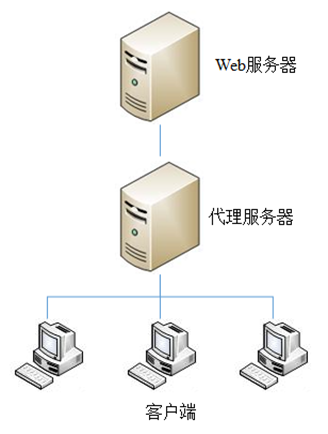

并非所有的代理服务器都适合网络爬虫，我们在使用代理服务器时，主要考虑代理服务器的匿名程度。根据代理服务器的匿名程度，代理服务器可以分为3类，分别是高度匿名代理、普通匿名代理和透明代理。  
**高度匿名代理：会将数据包原封不动地转发给服务器，让服务器认为当前访问的用户只是一个普通客户端，而不是代理服务器，并记录代理服务器的IP地址。  
  
**普通匿名代理：会对数据包进行一些改动，这时服务器可能会发现当前访问的用户是代理服务器，也可能会追查到客户端的真实IP地址。  
  
**透明代理：不仅会改动数据包，还会暴露当前访问客户端的真实IP地址。  
  
使用高度匿名代理服务器，对方服务器完全不知道客户端使用了代理，更不知道客户端的真实IP地址，代理的信息完全替代了客户端的所有信息；  
  
使用普通匿名代理服务器，虽然对方服务器可以知道客户端使用了代理，但并不知道客户端的真实IP地址；  
  
使用透明代理服务器，对方服务器可以知道客户端使用了代理，并且也知道客户端的真实IP地址。因此，高度匿名代理服务器是最理想的选择。

## 3.4.2 设置代理服务器

设置代理服务器一般分为两步，分别是获取代理IP和设置代理IP。

获取代理IP主要有3种方式：（1）获取免费代理IP；（2）获取付费代理IP；（3）ADSL拨号。

例如：将该IP地址设置为代理IP，基于该代理IP请求小兔鲜儿网首页。

In [ ]:
import requests,random

#设置4个代理IP
proxy_list = [{"http" : "101.200.127.149:8118"},{"http" : "http://59.55.162.4:3256"},{"http" : "http://180.122.147.76:3000"},{"http" : "http://114.230.107.102:3256"},{"http" : "http://121.230.211.163:3256"}]
base_url = 'http://erabbit.itheima.net/#/'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}

# 发送GET请求，将proxy_list中任意一个IP地址设为代理
re = requests.get(base_url, headers=header,proxies= random.choice(proxy_list))
#re = requests.get(base_url, headers=header)
print(re.status_code)

: 

In [ ]:
re = requests.get(base_url, headers=header)
print(re.status_code)

: 

## 3.4.3 检测代理IP的有效性

程序中使用的代理IP是免费的，由于这些代理IP的使用时间不固定，一旦超出使用时间范围就会失效，此时再运行上述程序会出现ProxyError异常。因此，这里建议大家换成自己查找的代理IP。

互联网上有很多免费的代理IP，这些IP地址并不都是有效的，为此我们需要对获取的免费IP地址进行检测，确定这个IP地址是否有效。检测代理IP的过程比较简单，我们需要先遍历收集的所有代理IP，分别将取出来的每个代理IP依次设为代理，再通过该IP地址向网站发送请求，如果请求成功，则说明该IP地址是有效的；如果请求失败，则说明该IP地址是无效的，需将该IP地址进行剔除。

例：检测代理IP的有效性。

In [ ]:
proxy_list = [{"http" : "http://172.104.41.13:16379"},{"http" : "http://113.201.49.140:8118"},{"http" : "http://113.143.37.82:9002"},{"http" : "http://123.138.214.150:9002"},{"http" : "http://42.63.65.117:80"}]
base_url = 'http://erabbit.itheima.net/#/'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}

#遍历代理IP
for per_ip in proxy_list.copy():
    try: # 发送GET请求，将获取的每个IP地址设置为代理
        re = requests.get(base_url, headers=header, proxies=per_ip, timeout=3)
    except: # 失败则输出IP地址无效，并将该IP地址从proxy_list列表中移除
        print(f'IP地址：{per_ip.get("http")}无效')
        proxy_list.remove(per_ip)
    else:   # 成功则输出IP地址有效
        print(f'IP地址：{per_ip.get("http")}有效') # 成功则输出IP地址有效

: 

: 